### Notebook for Project2 for Programming for Data Analysis

## An analysis of paleo-present climate data

Phelim Barry

***

## Table of Contents

1. [Introduction](#Introduction)
2. 

In [63]:
# Import Modules
import pandas as pd
import seaborn as sns
import json
import csv
import matplotlib.pyplot as plt
import numpy as np

### CO2 vs Temperatue Anomaly from 800kyrs - present


---

### CO2

### Read in CO2 Data files

In [64]:
# Read Data

# Need to install xlrd to reaad .xls file
# pip install xlrd

# Data from 800000 BC to 2000
ncei_df_col_names = ["year", "CO2", 'sigma']
ncei_df = pd.read_excel("https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2.xls", sheet_name="CO2 Composite",skiprows = range(1, 15),names=ncei_df_col_names)

# # Data from 2000 to 2020
gml_df_col_names = ["date", "CO2", 'UNC']
gml_df = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv",skiprows=44, sep=",", names=gml_df_col_names)

In [65]:
# Reformat the year column and create a new one as date

new_ncei_df = 1950-ncei_df['year']
ncei_df['date'] = new_ncei_df
ncei_df['date'] = ncei_df['date'].astype(int)

In [66]:
#gml_df.describe()
# Change the date to datetime rather than object
from datetime import datetime
#gml_df
# pd.to_datetime(gml_df['year'])
#pd.gml_df['year'] = datetime.strptime(gml_df['year'], '%y')

In [67]:
ncei_df

,year,CO2,sigma,date
0,-51.030000,368.022488,0.060442,2001
1,-48.000000,361.780737,0.370000,1998
2,-46.279272,359.647793,0.098000,1996
3,-44.405642,357.106740,0.159923,1994
4,-43.080000,353.946685,0.043007,1993
...,...,...,...,...
1896,803925.284376,202.921723,2.064488,-801975
1897,804009.870607,207.498645,0.915083,-802059
1898,804522.674630,204.861938,1.642851,-802572
1899,805132.442334,202.226839,0.689587,-803182


### Plot CO2 Data

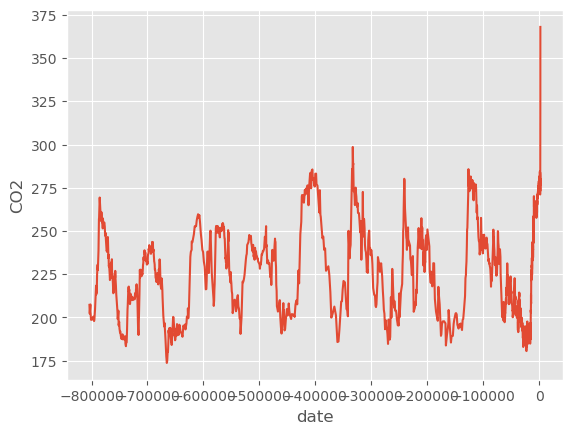

In [68]:
sns.lineplot(data=ncei_df, x='date', y='CO2');

In our first plot we use the data from xxx to plot the CO2 values from 2000 back to 800000 BC. We can see that up to about 1950 the plot is pretty consistent. There are peaks and troughs along the way but values for CO2 generally stay between 175 and 300. However from 1950 through to 2000 the trend is a significant and very sharp increase in CO2 levels.

<Axes: xlabel='date', ylabel='CO2'>

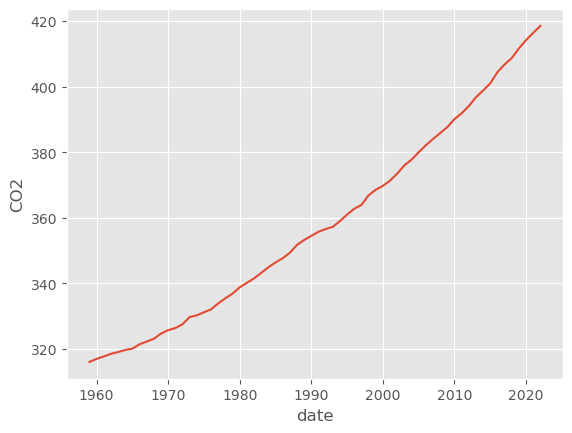

In [69]:
sns.lineplot(data=gml_df, x='date', y='CO2')

In our second plot using data from NOAA we plot the CO2 values from 1959 through to 2020 and can see a steady and consistent rise in CO2 levels.

In [70]:
# ncei_df.head(48)

In [71]:
# gml_df.head(43)

### Combine the data to validate the data is similar for overlapping years

In [72]:
# Extract data for overlapping years

gml_comp_df = gml_df.head(43)
# Reverse the order in the dataframe. From: https://stackoverflow.com/questions/20444087/right-way-to-reverse-a-pandas-dataframe
gml_comp_df.iloc[::-1]
ncei_comp_df = ncei_df.head(48)

In [73]:
#sns.lineplot(data=gml_comp_df, x='year', y='CO2')
#sns.lineplot(data=ncei_comp_df, x='date', y='CO2')

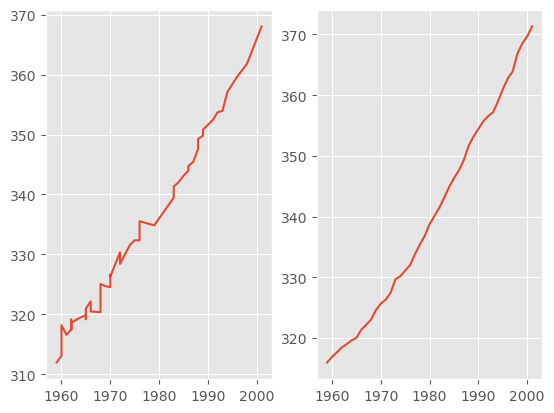

In [74]:
# Combine the plots to validate similar data
# If the data matches then we are good to combine the files for use as our final data file

figure, (ax1, ax2) = plt.subplots(1, 2)
# data=ncei_comp_df, x='date', y='CO2'
x1 = ncei_comp_df['date']
y1 = ncei_comp_df['CO2']

x2 = gml_comp_df['date']
y2 = gml_comp_df['CO2']

ax1.plot(x1, y1);
ax2.plot(x2, y2);

Analysis of the plots...

When comparing the data from both data sources for the years that overlap (xxxx - yyyy) we can see that from the above plots that the trend is very similar. Both start with readings in the 310s and finish close to 370. Data from (source1) shows a number of dips in the reading as opposed to (source for plot2) which is a much smoother line.
...

From this we can make an assumption that it is OK to combine the plots to give us data to present day...

### Combine CO2 dataframes so as to give -800000 to present day data

ncei data = -800000 to 2001   
gml data = 1959 to 2022

In [75]:
# split out required data

final_ncei_df = ncei_df[['date', 'CO2']] # -800000 to 2001 
final_gml_df = gml_df[['date', 'CO2']].tail(21) # 2002 to 2022
final_gml_df['date'] = gml_df['date'].astype(int)
final_gml_df = final_gml_df.sort_values(by=['date'],ascending=False)

#Concatenate the two - https://pandas.pydata.org/docs/user_guide/merging.html
dfs_to_concat = [final_gml_df, final_ncei_df]
final_co2_df = pd.concat(dfs_to_concat, ignore_index = True)

#final_co2_df.head (40)



### Complete CO2 plot from 800000 BC to 2022

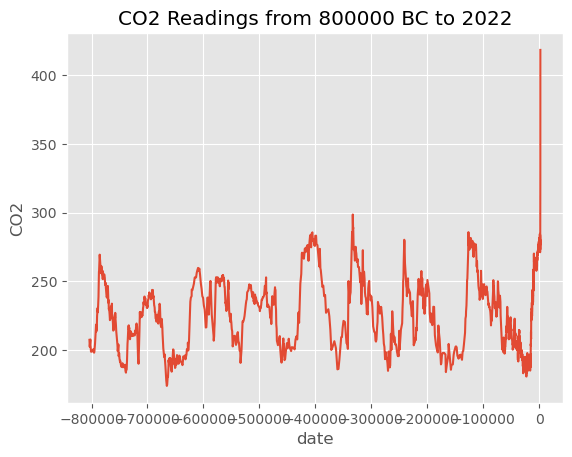

In [76]:
sns.lineplot(data=final_co2_df, x='date', y='CO2').set(title='CO2 Readings from 800000 BC to 2022');

### CO2 plot from 1500 to 2022

To get a clearer picture of when the increase started to happen we reduce the years and start from the 1500s...it all kicked off in the late 1700s which corrospond with the INdustrial Revolution   
***https://en.wikipedia.org/wiki/Industrial_Revolution


Also use this - https://css.umich.edu/publications/factsheets/climate-change/greenhouse-gases-factsheet to illustrate how the co2 was consistent up to 1750 but then went mad...
Cite as: Center for Sustainable Systems, University of Michigan. 2023. "Greenhouse Gases Factsheet." Pub. No. CSS05-21.

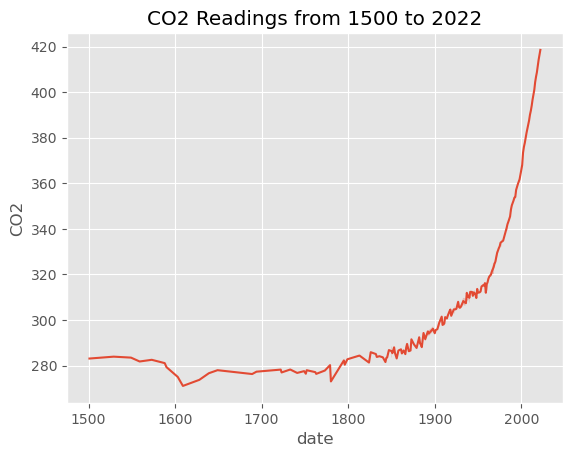

In [77]:
reduced_final = final_co2_df.head(219)

sns.lineplot(data=reduced_final, x='date', y='CO2').set(title='CO2 Readings from 1500 to 2022');

## Temperature

### Import the Temperature/Temperature Anomoly Data


In [78]:
# Read in the data from NOAA source - https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt
# Column 5: Temperature estimate (temperature difference from the average of the last 1000 years)
temp1_col_names = ["bag", "ztop", 'age', 'Deot', 'Temp']
temp1_df = pd.read_csv("https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt", skiprows = 92, delim_whitespace=True, names=temp1_col_names)


In [79]:
# Clean up the date and headings

new_temp_df2 = 1950-temp1_df['age']
temp1_df['date'] = new_temp_df2
temp1_df['date'] = temp1_df['date'].astype(int)

In [80]:
#temp1_df

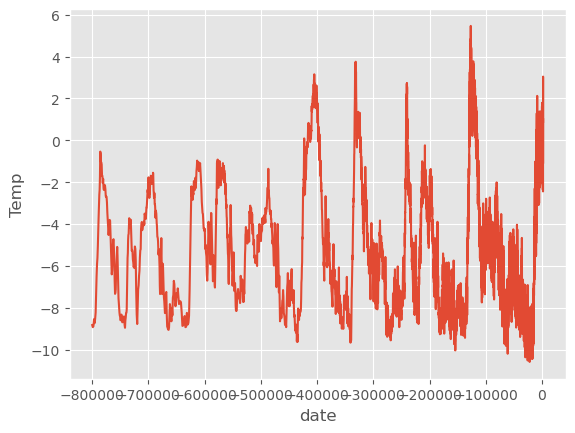

In [81]:
# Plot the Temperature Anomoly Data from -800000 to 2000

sns.lineplot(temp1_df, x='date', y='Temp');

<Axes: xlabel='date', ylabel='Temp'>

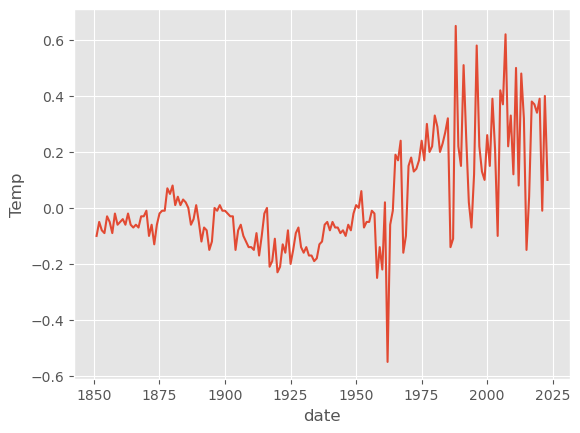

In [82]:
# Import Temperature Anomoly data from 1850 to present
temp2_col_names = ['date', 'Temp']
temp2_df = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/antarctic/land_ocean/12/11/1850-2023/data.csv", skiprows = 5, sep=',', names=temp2_col_names)

sns.lineplot(data=temp2_df, x='date', y='Temp')

In [83]:
# split out required data to combine both datasets
final_temp1_df = temp1_df[['date', 'Temp']] # -800000 to 2000 
final_temp2_df = temp2_df[['date', 'Temp']].tail(23) # 2001 to 2022
final_temp2_df['date'] = final_temp2_df['date'].astype(int)
final_temp2_df = final_temp2_df.sort_values(by=['date'],ascending=False)

# Concatenate the two - https://pandas.pydata.org/docs/user_guide/merging.html
dfs_to_concat2 = [final_temp2_df, final_temp1_df]
final_df_2 = pd.concat(dfs_to_concat2, ignore_index = True)

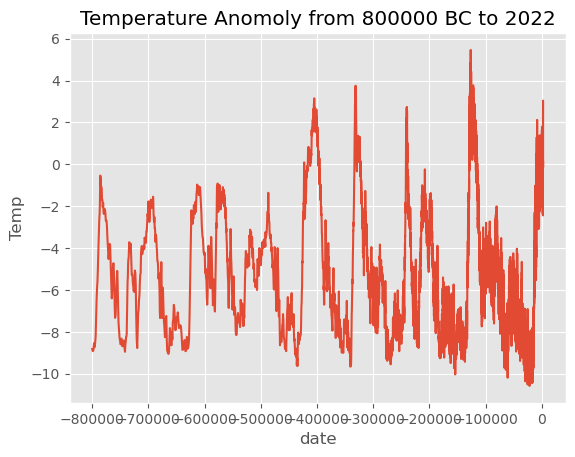

In [84]:
# plot the Temperature Anomoly data for -800000 to 2022 - temperature difference from the average of the last 1000 years
sns.lineplot(data=final_df_2, x='date', y='Temp').set(title='Temperature Anomoly from 800000 BC to 2022');

Cold periods seems to last longer while hot periods are getting hotter...

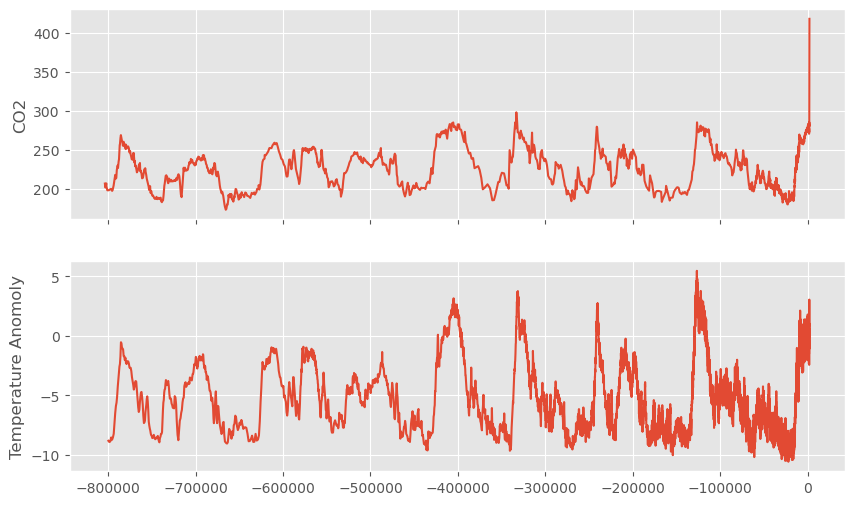

In [85]:
# Plot CO2 v Temperature Anomoly
# Use of ggplot from https://www.geeksforgeeks.org/data-visualization-using-plotnine-and-ggplot2-in-python/
# and https://notebook.community/CommonClimate/teaching_notebooks/GEOL157L/GEOL157_Lab5_paleclimate_records

plt.style.use('ggplot')
fig, ax = plt.subplots(2,sharex=True,figsize=(10,6))
ax[0].plot(final_co2_df['date'],final_co2_df['CO2'])
ax[0].set_ylabel(r'CO2')

ax[1].plot(final_df_2['date'],final_df_2['Temp'])
ax[1].set_ylabel(r'Temperature Anomoly');
#ax[0].set_xlabel('Temp Anomoly')
#fig.subplots_adjust(hspace=0)

Analysis of plots

We can see that over the last 800000 years that peaks in the CO2 reading coincides with peaks in Temperature Anomoly...

## CH4

Sources:   
-800000 to 2015 : https://climatechange.chicago.gov/climate-indicators/climate-change-indicators-atmospheric-concentrations-greenhouse-gases   
https://climatechange.chicago.gov/sites/production/files/2016-08/ghg-concentrations_fig-2.csv   


1984 - 2022 : https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt   
from https://gml.noaa.gov/ccgg/trends_ch4/

In [86]:
# Import CH4 data for -800000 to 2015

# Note: due to issues with the file format/encoding of the source data, we use a locally saved copy instead.

ch4_col_names = ['year', 'CH4', 'law', 'cape', 'Mauna', 'Shetlands']
# ch4_df = pd.read_csv("https://climatechange.chicago.gov/sites/production/files/2016-08/ghg-concentrations_fig-2.csv", skiprows = 8, sep = ',', names=ch4_col_names)
ch4_df = pd.read_excel("source_data/CH4_data.xlsm", sheet_name="sheet1",skiprows = range(1, 8),names=ch4_col_names)

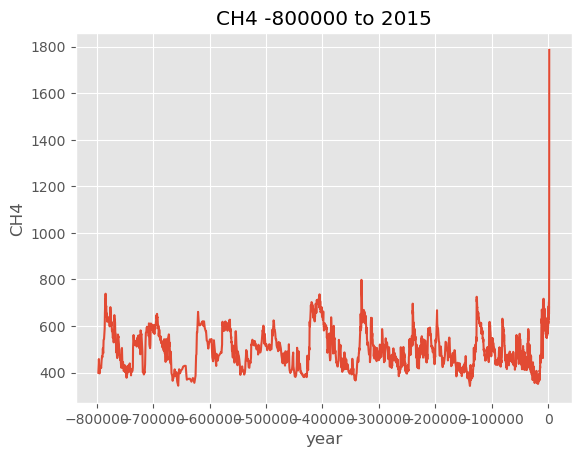

In [87]:
# Fill in the gaps from the other readings
ch4_df.CH4.fillna(ch4_df.law, inplace=True)
ch4_df.CH4.fillna(ch4_df.cape, inplace=True)
ch4_df.CH4.fillna(ch4_df.Mauna, inplace=True)

# Drop row with invalid data: https://stackoverflow.com/questions/60698147/how-to-drop-a-row-using-iloc-method
ch4_df.drop(labels=2175, inplace=True)

# Plot the graph
sns.lineplot(data=ch4_df, x='year', y='CH4').set(title='CH4 -800000 to 2015');


In [88]:
# Import CH4 data for 1984 to 2022

ch4v2_col_names = ['year', 'CH4', 'unc']
ch4v2_df = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt", skiprows = 46, delim_whitespace=True, names=ch4v2_col_names)


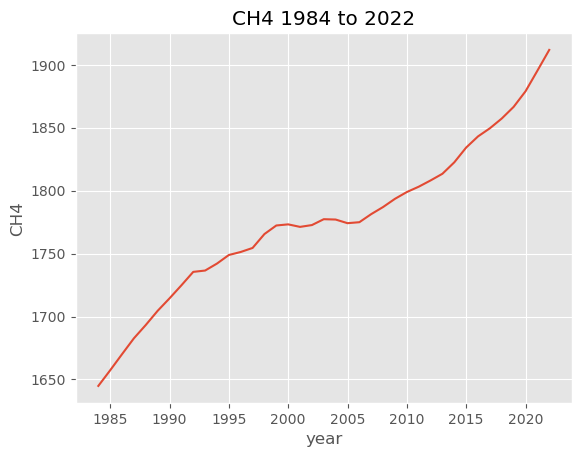

In [89]:
sns.lineplot(data=ch4v2_df, x='year', y='CH4').set(title='CH4 1984 to 2022');

In [90]:
# split out required data to combine both datasets
final_CH4_df = ch4_df[['year', 'CH4']] # -800000 to 2015 
final_CH4_df2 = ch4v2_df[['year', 'CH4']].tail(7) # 2016 to 2022

# Concatenate the two - https://pandas.pydata.org/docs/user_guide/merging.html
dfs_to_concat_ch4 = [final_CH4_df, final_CH4_df2]
final_ch4_df = pd.concat(dfs_to_concat_ch4, ignore_index = True)
#final_ch4_df


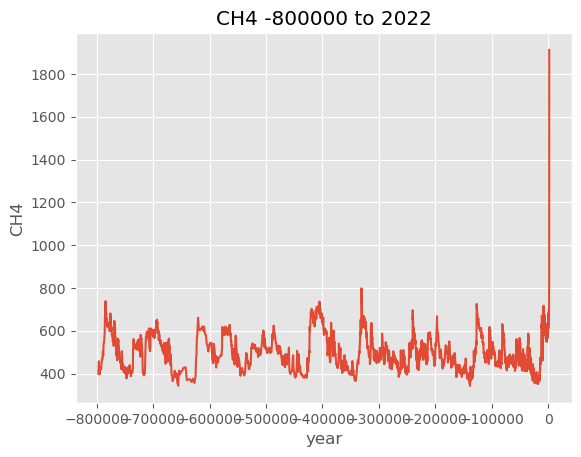

In [91]:
# final_ch4_df = final_ch4_df.astype(int)
sns.lineplot(data=final_ch4_df, x='year', y='CH4').set(title='CH4 -800000 to 2022');

In [92]:
print(f"The average CH4 reading up to 1900 was {final_ch4_df['CH4'].head(2143).mean():.2f} degrees c. However, since 1900 the average is {final_ch4_df['CH4'].tail(72).mean():.2f}")

The average CH4 reading up to 1900 was 523.71 degrees c. However, since 1900 the average is 1465.39


From looking at our CH4 grabh going back to 800000 BC we can see that the average stayed pretty consistent with instances of a quick rise in readings followed by a gradual fall back down to around 400 each time. However it's clear that in the last couple of hundred years that the CH4 values have dramatically increased 4 fold.


Some data here to references - https://www.google.ie/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj14bjN-LyDAxVwavEDHUx-C0wQFnoECBMQAw&url=https%3A%2F%2Fcss.umich.edu%2Fpublications%2Ffactsheets%2Fclimate-change%2Fgreenhouse-gases-factsheet&usg=AOvVaw3wiE2dzVsPAtVgOhR9nDF7&opi=89978449   

Use this as a reference also: https://css.umich.edu/publications/factsheets/climate-change/greenhouse-gases-factsheet   
Cite as : Center for Sustainable Systems, University of Michigan. 2023. "Greenhouse Gases Factsheet." Pub. No. CSS05-21.


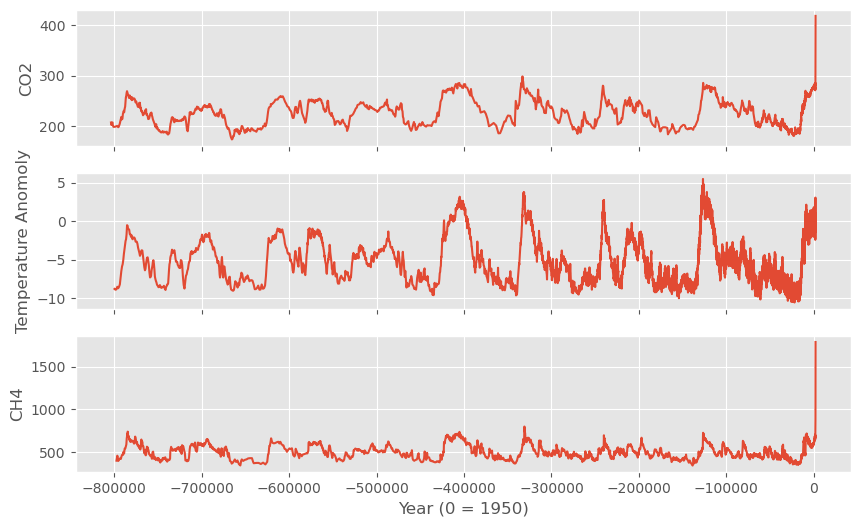

In [93]:

# Plot all three - CO2, Temperature Anomoly and CH4 

plt.style.use('ggplot')
fig, ax = plt.subplots(3,sharex=True,figsize=(10,6))
ax[0].plot(final_co2_df['date'],final_co2_df['CO2'])
ax[0].set_ylabel(r'CO2')

ax[1].plot(final_df_2['date'],final_df_2['Temp'])
ax[1].set_ylabel(r'Temperature Anomoly')

ax[2].plot(ch4_df['year'],ch4_df['CH4'])
ax[2].set_ylabel(r'CH4')
ax[2].set_xlabel(r'Year (0 = 1950)');

From looking at the three graphs plotted together, it's clear to see that the peaks and troughs align with each other. Right back from 800000 BC, the Temperature Anomoly, CH4 and CO2 values all rise and fall at approx. the same time. Most interesting, is the recent values from 1950 onwards. We can see that both the values for CO2 and CH4 rise at an extraordinary rate compared to the previous years. We can also see that although the Temperature Anomoly is not as high as the peak of approx. 125000 BC it has been staying above 0 for a considerable length of time.


---

### Irish Context

In this section we will examine Irish data in terms of Temperature and Rainfall and look at the trend over the last 50 years.

Check this link and reference it - https://www.sciencedirect.com/science/article/pii/S2212094723000610#bib13


---

For our analysis of the Irish data in terms of temperature and rainfall, the Irish Meteorological Service of Ireland has a number of stations around the country capturing data which we use. We have decided to use the data produced by the Sherkin Island station as the numbers it records are almost identical to the overall country average. For example the yearly average rainfall taking the country as a whole is approx 1200mm (https://www.google.ie/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjvwKKa8byDAxWWZ_EDHXSvB-UQFnoECCcQAQ&url=https%3A%2F%2Fclimateknowledgeportal.worldbank.org%2Fcountry%2Fireland%2Fclimate-data-historical&usg=AOvVaw3FSxHW6oxL4eAnwtO-fCY3&opi=89978449) while Sherkin Island produces an average of 1195mm. 

The long term datasets used in this analysis are availble for download from the met.ie website (https://www.met.ie/climate/available-data/long-term-data-sets/)


In [94]:
# Read in data
# Data sourced from https://www.met.ie/climate/available-data/historical-data (Sherkin Island)

ir_si_data_col_names = ['date', 'rain', 'maxt', 'mint']
ir_data_si_df = pd.read_csv("source_data/sherkin_island_1972_2023.csv", skiprows = range(0, 745), sep=',', names=ir_si_data_col_names, usecols=[0,2,4,6])

In [95]:
# Data Cleanup

# Convert date field to datetime
ir_data_si_df['date'] = pd.to_datetime(ir_data_si_df['date'])

# Convert date field to period in months
ir_data_si_df['date2'] = ir_data_si_df['date'].dt.to_period('Y')

# Get average rainfall by year/month
df_mean = ir_data_si_df.groupby(['date2'])[['rain']].mean() # https://stackoverflow.com/questions/74578718/pandas-dataframe-column-name-is-oriented-incorrectly
df_mean = df_mean.reset_index() 

# Changing datetime from period back to Datetime: https://stackoverflow.com/questions/57580072/changing-period-to-datetime
df_mean['date2'] = df_mean['date2'].astype(str)
df_mean['date2'] = pd.to_datetime(df_mean['date2'])

### Rainfall Analysis

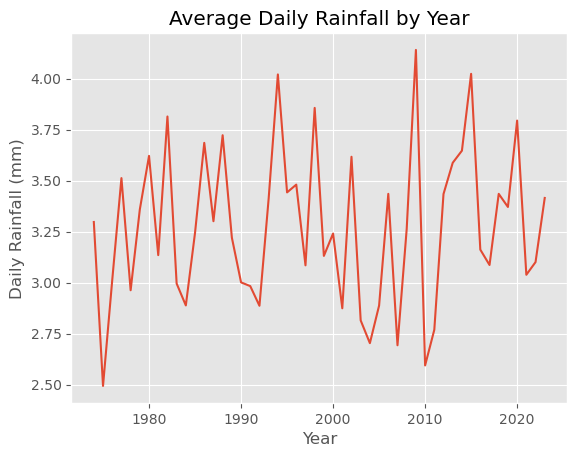

In [96]:
# Plot the rainfall graph
ax = sns.lineplot(data=df_mean, x='date2', y='rain')
ax.set(xlabel='Year',
       ylabel='Daily Rainfall (mm)',
       title='Average Daily Rainfall by Year');

In [97]:
print(f"The mean daily rainfall recorded at Sherkin Island is {df_mean['rain'].mean():.2f}mm or a total of {(df_mean['rain'].mean()*365):.2f}mm yearly")

The mean daily rainfall recorded at Sherkin Island is 3.27mm or a total of 1194.96mm yearly


From our graph showing the average daily rainfall recorded at Sherkin Island for the last 50 years, we can see that the average is somewhere around 3.25 mm. We see that some years are wetter than others, in particular, 2009 had the highest daily average rainfall of almost 4.25 mm while 1974 had the lowest daily average rainfall of 2.5mm.   

Overall, the peaks and troughs seem to balance out with a wetter year typically following a drier year. The 2000s seemed to have been the driest decade and interestingly enough, since 2010 there has only been one year where the average daily rainfall was below 3mm indicating that potentially we are getting more rain in the last decade then before. 

### Temperature Analysis

In [98]:
# Cleanup minimum temperate data

# Get average min temp by year/month
ir_data_si_df["mint"] = pd.to_numeric(ir_data_si_df["mint"], errors='coerce')
df_mint = ir_data_si_df.groupby(['date2'])[['mint']].mean(numeric_only=True) # https://stackoverflow.com/questions/74578718/pandas-dataframe-column-name-is-oriented-incorrectly
df_mint = df_mint.reset_index() 

# Changing datetime from period back to Datetime: https://stackoverflow.com/questions/57580072/changing-period-to-datetime
df_mint['date2'] = df_mint['date2'].astype(str)
df_mint['date2'] = pd.to_datetime(df_mint['date2'])

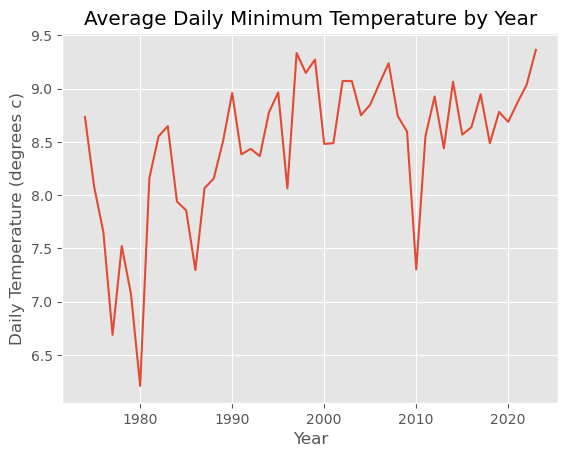

In [99]:
# Plot the minimum temperature graph

ax = sns.lineplot(data=df_mint, x='date2', y='mint');
ax.set(xlabel='Year',
       ylabel='Daily Temperature (degrees c)',
       title='Average Daily Minimum Temperature by Year');

In [100]:
print(f"The mean daily minimum temperature recorded at Sherkin Island over the last 50 years is {df_mint['mint'].mean():.2f} degrees c. \nHowever, over the last 30 years that has risen to {df_mint['mint'].tail(34).mean():.2f} degrees c.")

The mean daily minimum temperature recorded at Sherkin Island over the last 50 years is 8.46 degrees c. 
However, over the last 30 years that has risen to 8.76 degrees c.


From our graph above we can see that there is an upward trend in minimum daily temperatures over the last 50 years. Particularly since 1990 when the minimum daily temperature only dipped below the 50 year average on four occasions with one of those being the big freeze of 2010. We have experienced a 0.3 degree c rise in the average when comparing the last 30 years with the last 50 years.

In [101]:
# Cleanup maximum temperate data

ir_data_si_df["maxt"] = pd.to_numeric(ir_data_si_df["maxt"], errors='coerce')
df_maxt = ir_data_si_df.groupby(['date2'])[['maxt']].mean(numeric_only=True) # https://stackoverflow.com/questions/74578718/pandas-dataframe-column-name-is-oriented-incorrectly
df_maxt = df_maxt.reset_index() 

# Changing datetime from period back to Datetime: https://stackoverflow.com/questions/57580072/changing-period-to-datetime
df_maxt['date2'] = df_maxt['date2'].astype(str)
df_maxt['date2'] = pd.to_datetime(df_maxt['date2'])

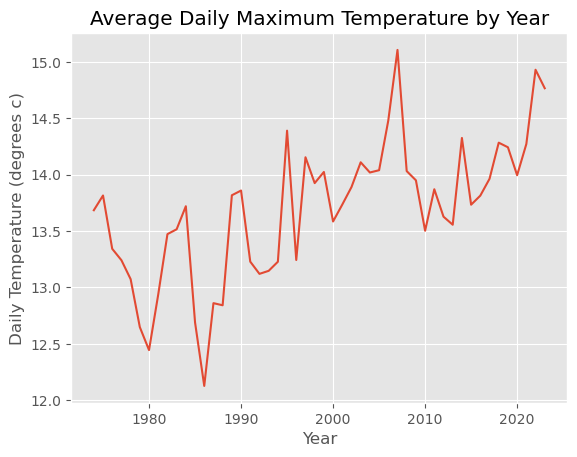

In [102]:
# Plot the maximum temperature graph

ax = sns.lineplot(data=df_maxt, x='date2', y='maxt');
ax.set(xlabel='Year',
       ylabel='Daily Temperature (degrees c)',
       title='Average Daily Maximum Temperature by Year');

In [103]:
print(f"The mean daily maximum temperature recorded at Sherkin Island over the last 50 years is {df_maxt['maxt'].mean():.2f} degrees c. \nHowever, over the last 20 years that has risen to {df_maxt['maxt'].tail(24).mean():.2f} degrees c.")

The mean daily maximum temperature recorded at Sherkin Island over the last 50 years is 13.69 degrees c. 
However, over the last 20 years that has risen to 14.08 degrees c.


For the mean daily maximum temperature we see a similar trend as with the mean daily minimum temperature. Again, the data is on an upward trend with the majority of values over the last 20 years being above the 50 year average. Indeed, the average for the last 20 years is almost 0.4 degrees higher than the 50 year average.

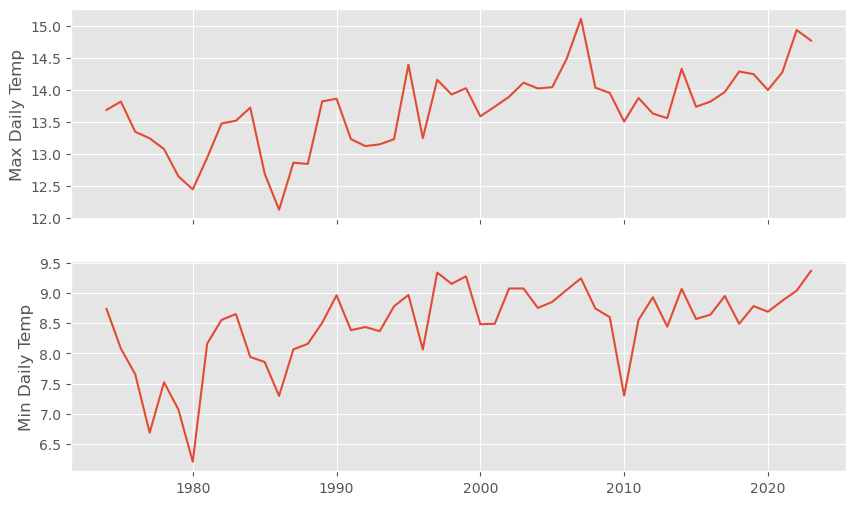

In [104]:
# Compare and plot Average Daily Min and Max Temperatures

plt.style.use('ggplot')
fig, ax = plt.subplots(2,sharex=True,figsize=(10,6))

ax[0].plot(df_maxt['date2'],df_maxt['maxt'])
ax[0].set_ylabel(r'Max Daily Temp')

ax[1].plot(df_mint['date2'],df_mint['mint'])
ax[1].set_ylabel(r'Min Daily Temp');

The above chart shows how both the maximum and minimum daily average temperatures are both generally on the rise and at a very similar rate.

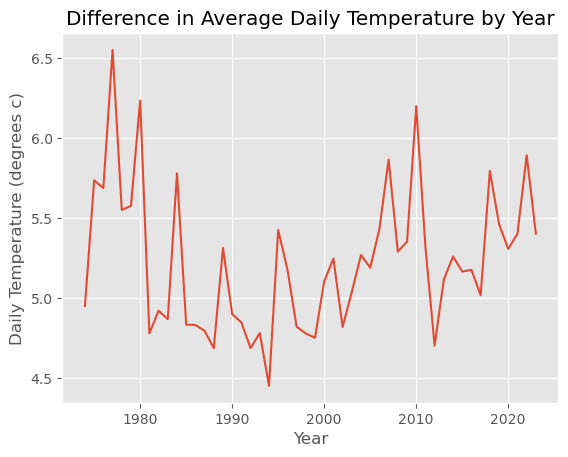

In [105]:
# Plot daily difference in temperature

temp_comp = df_mint
temp_comp['maxt'] = df_maxt['maxt']
temp_comp['diff'] = temp_comp['maxt']-temp_comp['mint']


ax = sns.lineplot(data=temp_comp, x='date2', y='diff');
ax.set(xlabel='Year',
       ylabel='Daily Temperature (degrees c)',
       title='Difference in Average Daily Temperature by Year');

When looking at the delta between the average daily maximum and minimum temperature values we can see that the average is approx. 5.5 degrees c. This has reached a peak of 6.5 and a low of 4.5 but is generally consistent. This shows us that as the minimum temperature rises so does the maximum temperature at a similar rate.

### Fuse and Export to csv and json

In [106]:
# Create final dataframe by fusing them together

# Pull in each of the data sources
very_final_df = final_df_2
very_final_df = very_final_df.rename({'date': 'temp_date', 'Temp': 'temp_anom'}, axis='columns')

# Use inner join with concat: https://sparkbyexamples.com/pandas/pandas-concat-dataframes-explained/
very_final_df= pd.concat([very_final_df, final_co2_df], axis=1, join='inner')
very_final_df = very_final_df.rename({'date': 'co2_date', 'CO2': 'co2_reading'}, axis='columns')

very_final_df= pd.concat([very_final_df, final_ch4_df], axis=1, join='inner')
very_final_df = very_final_df.rename({'year': 'ch4_date', 'CH4': 'ch4_reading'}, axis='columns')

very_final_df= pd.concat([very_final_df, ir_data_si_df], axis=1, join='inner')
very_final_df = very_final_df.drop('date2', axis=1)
very_final_df = very_final_df.rename({'date': 'ir_date', 'rain': 'rainfall','maxt': 'max_temp', 'mint': 'min_temp'}, axis='columns')


In [107]:
# Export final dataframe to csv

FILENAME = "exports/csv_text.csv"
with open(FILENAME, 'w', newline = '') as f:
    writer = csv.writer(f)
    writer.writerows([
        ['Column Descriptions', None],
        ['----', '----'],
        ['temp_date', 'Date of Temperature Reading'],
        ['temp_anom', 'Temperature Anomoly Value'],
        ['co2_date', 'Date of CO2 Reading'],
        ['co2_reading', 'CO2 Value'],
        ['ch4_date', 'Date of CH4 Reading'],
        ['ch4_reading', 'CH4 Value'],
        ['ir_date', 'Irish Data - Date of Reading'],
        ['rainfall', 'Irish Data - Daily Rainfall Value'],
        ['max_temp', 'Irish Data - Maximum Daily Temperature Value'],
        ['min_temp', 'Irish Data - Mimimun Daily Temperature Value'],
        ['', '']
    ])
very_final_df.to_csv(FILENAME, mode = 'a', index = False) # https://stackoverflow.com/questions/17530542/how-to-add-pandas-data-to-an-existing-csv-file

In [108]:
# Export final dataframe to json
# note to self - need to find a way to write the header details to json similar to csv above
# check this link - https://stackoverflow.com/questions/13949637/how-to-update-json-file-with-python

FILENAME = "exports/json_text.txt"
very_final_df.to_json(FILENAME, index = True)

### Analysis of all the above data - trends/relationships etc (temporal leads, lags, frequency analysis etc)



---

### Predict global temperature anomaly over next few decades (synthesise data) and compare to pushed climate modles - if atmospheric CO2 trends continue



---

Need to figure out the exact relationship between increase in CO2 and Temp...i.e. as CO2 increases, Temp goes up by x...

In [109]:
'''
plt.style.use('ggplot')
fig, ax = plt.subplots(2,sharex=True,figsize=(10,6))
ax[0].plot(final_co2_df['date'],final_co2_df['CO2'])
ax[0].set_ylabel(r'CO2')

ax[1].plot(final_df_2['date'],final_df_2['Temp'])
ax[1].set_ylabel(r'Temperature Anomoly');
'''
#final_co2_df.head(200)
#final_df_2.head(50)



"\nplt.style.use('ggplot')\nfig, ax = plt.subplots(2,sharex=True,figsize=(10,6))\nax[0].plot(final_co2_df['date'],final_co2_df['CO2'])\nax[0].set_ylabel(r'CO2')\n\nax[1].plot(final_df_2['date'],final_df_2['Temp'])\nax[1].set_ylabel(r'Temperature Anomoly');\n"

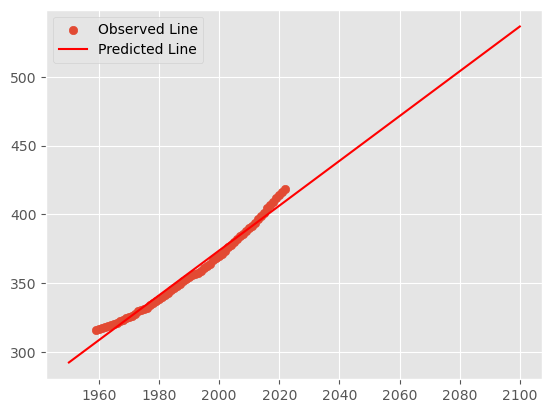

In [110]:
# Some stuff for future predictions

# Reshape/transpose data
# sns.lineplot(data=reduced_final, x='date', y='CO2').set(title='CO2 Readings from 1500 to 2022');
list1 = gml_df['date'].to_numpy() # Convert dataframe to array
list2 = gml_df['CO2'].to_numpy() # Convert dataframe to array
list3 = list1.reshape(-1,1)
list4 = list2.reshape(-1,1)

#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(list3,list4)

import numpy as np
x_test = np.linspace(1950,2100) # Need to decide on dates to use as the whole -800000 wouldn't make sense...
x_testShaped = x_test.reshape(-1,1)

y_testPred = lr.predict(x_testShaped)

plt.scatter(list3,list4)
plt.plot(x_test, y_testPred, 'r')
plt.legend(['Observed Line', 'Predicted Line'])
plt.show()

### Comment on accellerated warming based on very latest features (e.g temperature/polar-ice-coverage)



---

### Appendix/References etc

***

#### End

Notes:

Data Sources
Link to CO2 data -800000 to present+51 (present is 1950)
https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt   
Taken from https://www.ncei.noaa.gov/access/paleo-search/study/17975

Link to Mauna Loa data 1959 - 2022
https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv   
Taken from https://gml.noaa.gov/ccgg/trends/data.html

Link to Temperature data...